In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import make_blobs, make_classification
from sklearn.cluster import KMeans


warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Часть 1. EDA и Preprocessing.

In [2]:
data = pd.read_csv('d:\\Learning\\Otus\\ML_Professional\\exercises\\10_hw\\german_credit_data.csv', index_col = 0)
data.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [3]:
data.shape

(1000, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [5]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


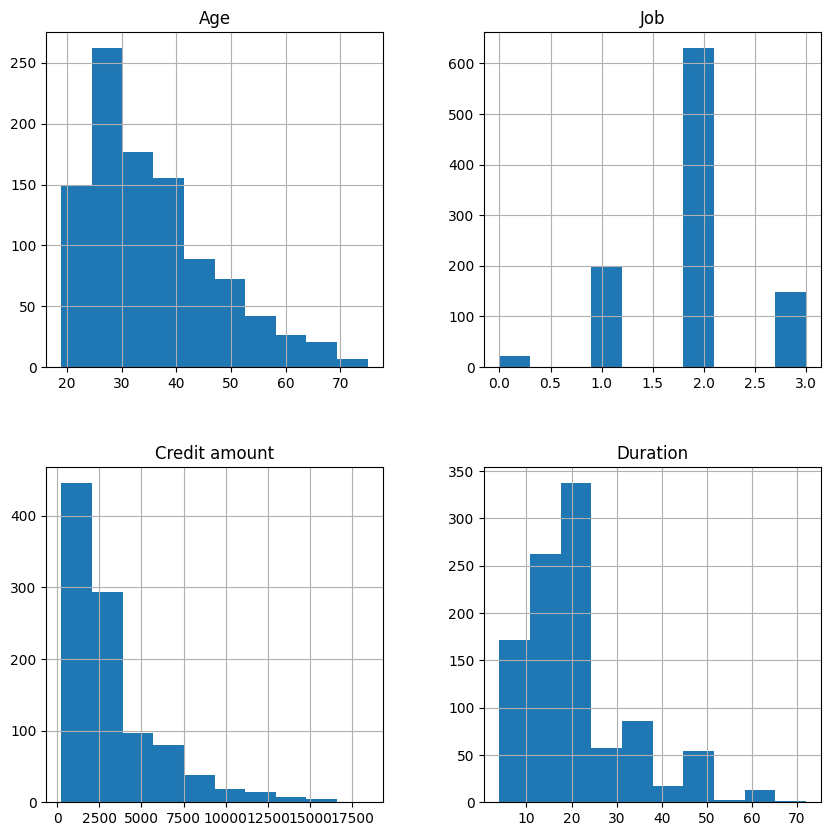

In [6]:
data.hist(figsize=(10,10));

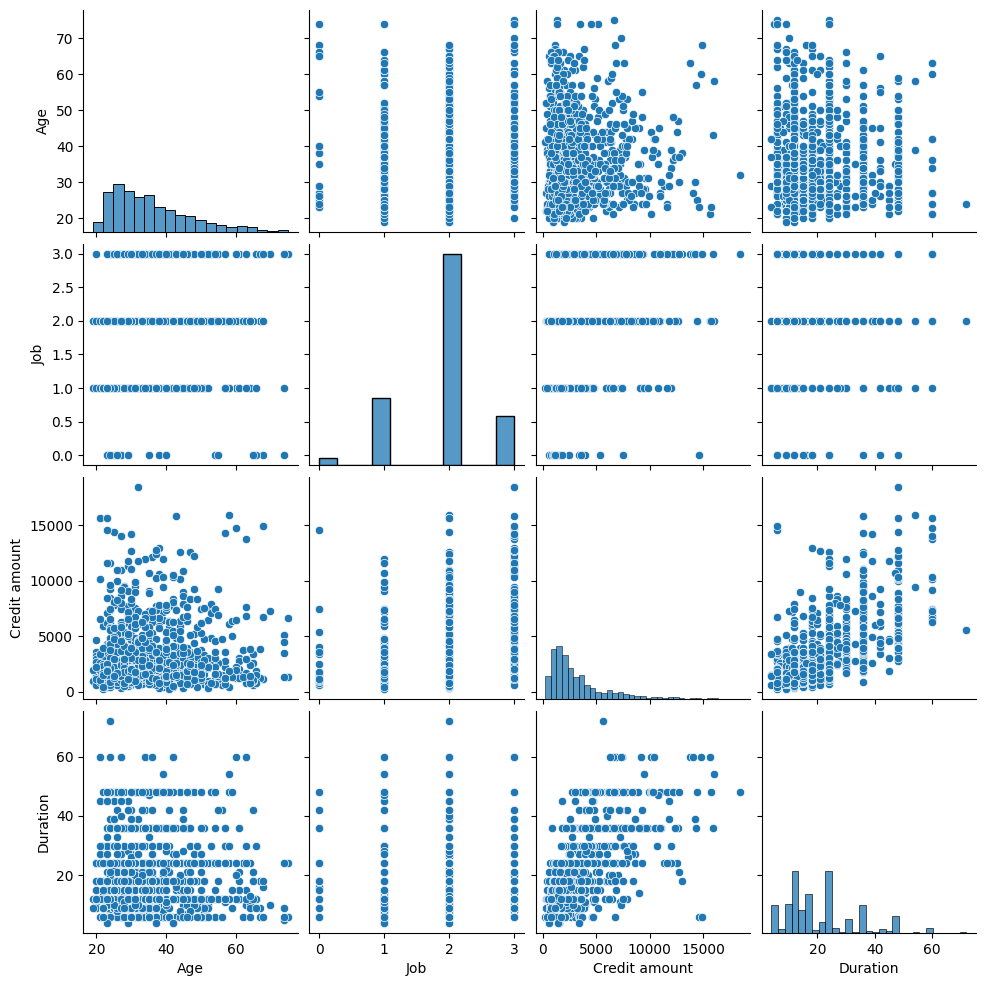

In [7]:
sns.pairplot(data);

In [8]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [9]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

In [10]:
data.Housing.unique()

array(['own', 'free', 'rent'], dtype=object)

In [11]:
data['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [12]:
data['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [13]:
data['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

#### Проверяем NULL значения

In [14]:
data.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
dtype: bool

#### проверяем сколько записей с null значением и если их мало, то удаляем их

In [15]:
data['Saving accounts'].isnull().any().sum()

1

In [16]:
data.dropna(subset = ['Saving accounts'], inplace = True)  

In [17]:
data['Checking account'].isnull().any().sum()

1

In [18]:
data.dropna(subset = ['Checking account'], inplace = True)  

In [19]:
data.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
dtype: bool

### 1.1. Преобразуем категориальные данные в числовые

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
df_ord_enc = data.copy()
enc = OrdinalEncoder()
df_ord_enc[['Sex','Housing', 'Saving accounts',
         'Checking account', 'Purpose']] = enc.fit_transform(df_ord_enc[['Sex','Housing', 
                                                                                    'Saving accounts', 'Checking account', 'Purpose']])
df_ord_enc.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0.0,2,1.0,0.0,1.0,5951,48,5.0
3,45,1.0,2,0.0,0.0,0.0,7882,42,4.0
4,53,1.0,2,0.0,0.0,0.0,4870,24,1.0
7,35,1.0,3,2.0,0.0,1.0,6948,36,1.0
9,28,1.0,3,1.0,0.0,1.0,5234,30,1.0


### 1.2. Корреляция

In [24]:
corr = df_ord_enc.corr()

In [25]:
mask = np.triu(np.ones_like(corr, dtype=bool))

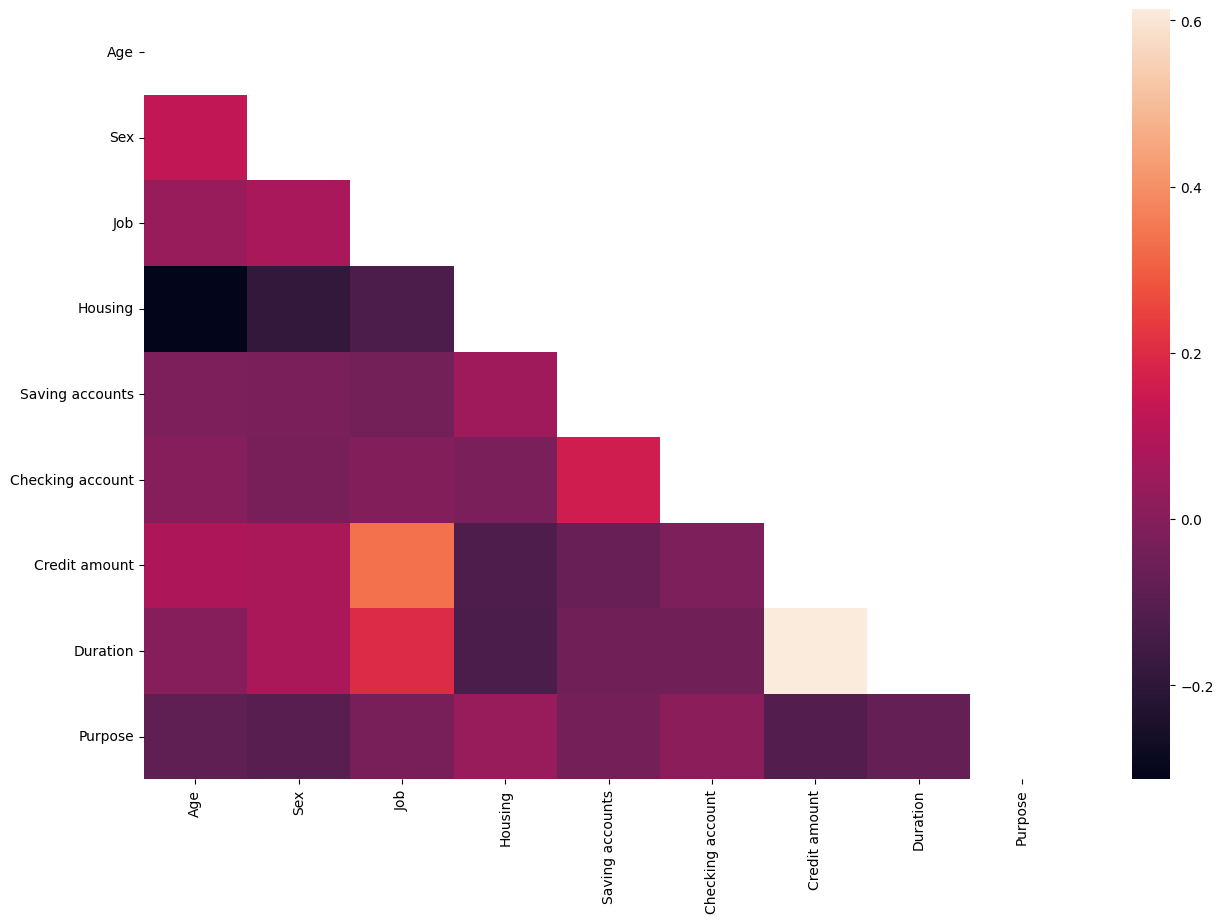

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

### 1.3. Нормализация
### Приведение данных к одному масштабу.
#### Данные необходимо привести к одному масштабу для того, чтобы уровнять влиенияе признаков в модели на целевую переменную

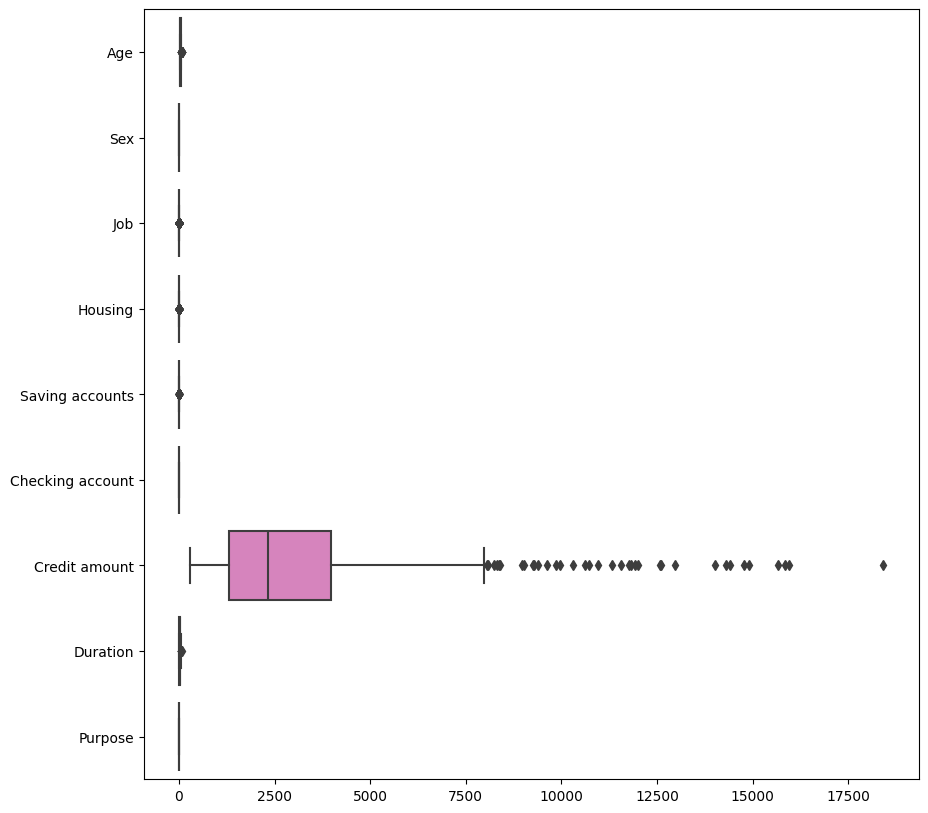

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_ord_enc, orient='h');

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_ord_enc)
data_scaled = pd.DataFrame(X_scaled, columns=df_ord_enc.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.053571,0.0,0.666667,0.5,0.0,0.5,0.312707,0.636364,0.714286
1,0.464286,1.0,0.666667,0.0,0.0,0.0,0.419110,0.545455,0.571429
2,0.607143,1.0,0.666667,0.0,0.0,0.0,0.253141,0.272727,0.142857
3,0.285714,1.0,1.000000,1.0,0.0,0.5,0.367644,0.454545,0.142857
4,0.160714,1.0,1.000000,0.5,0.0,0.5,0.273198,0.363636,0.142857


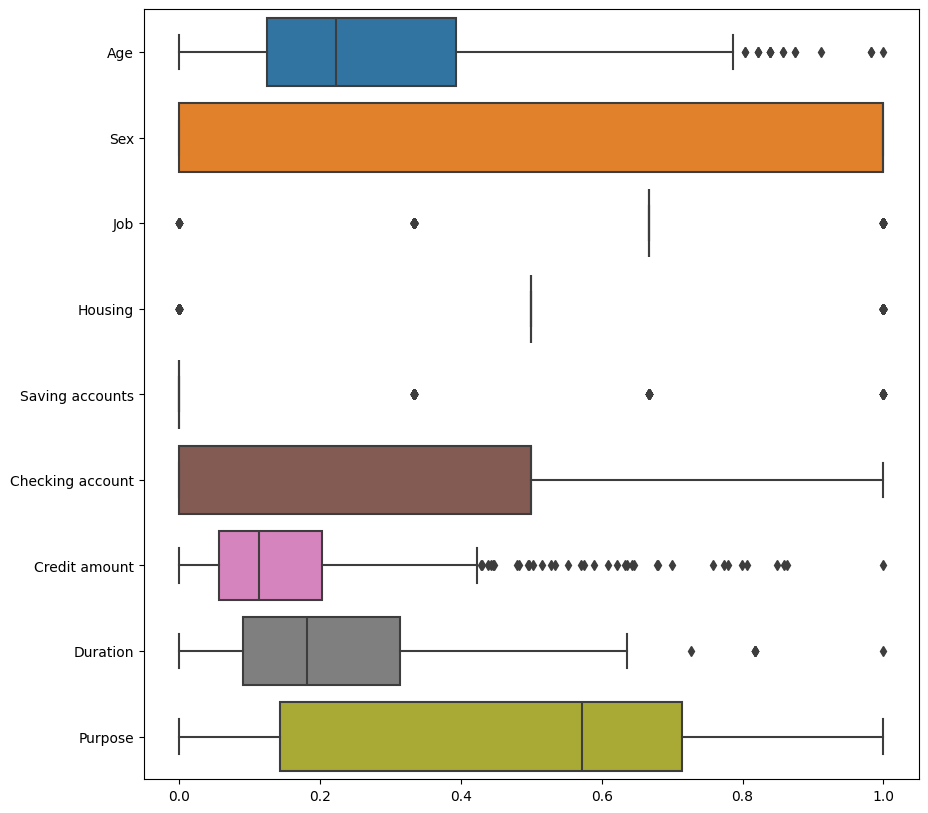

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_scaled, orient='h');

## Часть 2. Моделирование.

### 2.1. Снижение размерности. UMAP

In [33]:
from umap import umap_ as UMAP

In [34]:
umap = UMAP.UMAP(n_components=2, random_state=0)
X_umap = umap.fit_transform(X_scaled)
X_scaled.shape

(522, 9)

In [35]:
X_umap.shape

(522, 2)

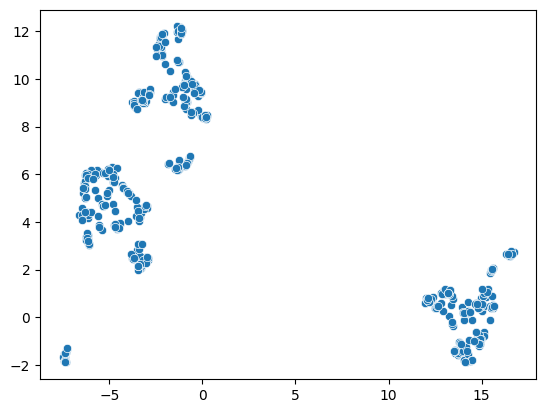

In [36]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1]);

### 2.2. Снижение размерности. TSNE

In [37]:
from sklearn.manifold import TSNE

In [38]:
tsne = TSNE(n_components=2, random_state=10)
X_scaled.shape

(522, 9)

In [39]:
X_tsne = tsne.fit_transform(X_scaled)
X_tsne.shape

(522, 2)

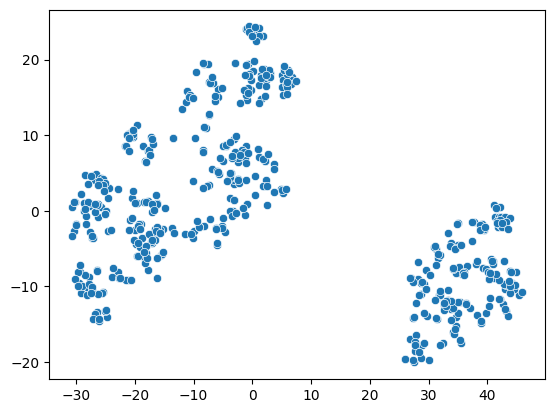

In [40]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1]);

### 2.3. Снижение размерности. PCA

In [44]:
from sklearn.decomposition import PCA
from plotly import express as px

In [42]:
pca = PCA(n_components=2)
# X_reduced = pca.fit_transform(X_sample)
X_pca = pca.fit_transform(X_scaled)

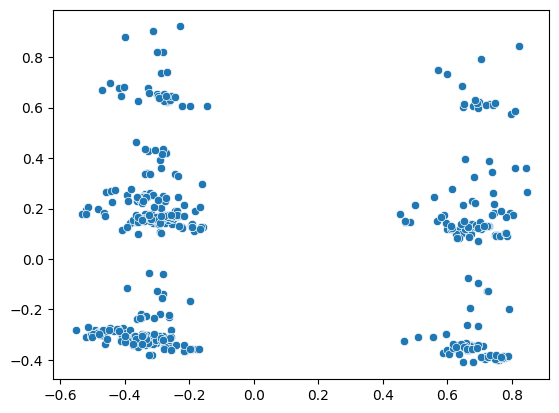

In [46]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1]);

### 2.4. Кластеризация

### 2.4.1. KMeans

In [88]:
kmeans = KMeans(n_clusters=3, random_state=10, n_init=10).fit(X_scaled)
labels = kmeans.labels_

<Axes: >

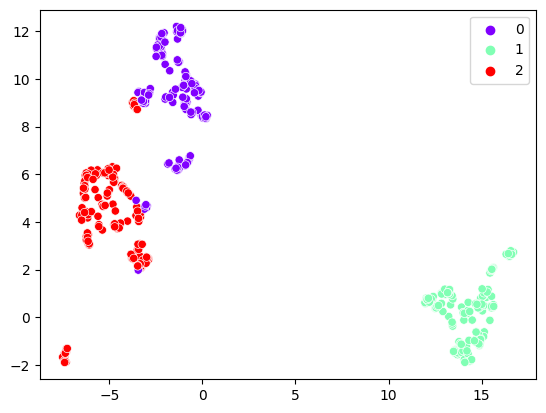

In [89]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels, palette='rainbow')

#### Выбор числа кластеров

In [85]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=10).fit(X_umap)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

In [86]:
inertia

[46434.703125,
 6407.62353515625,
 2464.072265625,
 1759.14599609375,
 1445.9124755859375,
 1141.85791015625,
 860.119140625,
 719.9576416015625,
 576.3235473632812,
 435.84539794921875]

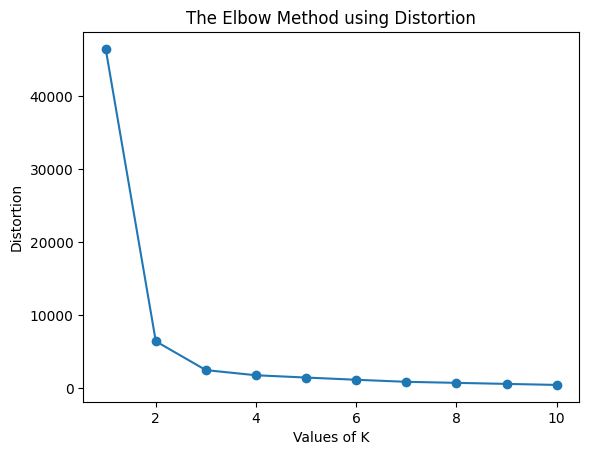

In [92]:
plt.plot(range(1,11), inertia, marker='o');
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#### Видим на графике, как меняется инерция(функция потерь).
#### Переломный момент происходит при cледующих количествах кластеров: 2, 3, 4

In [90]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

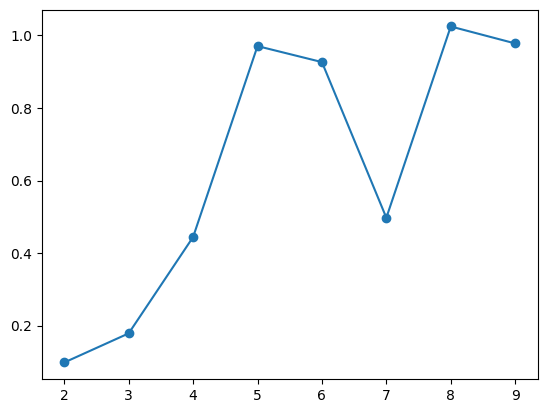

In [91]:
plt.plot(range(2,10), D, marker='o');

#### как видим на графике, минимум изменения инерции происходит при 2 кластерах, 
#### значит оптимальное количество кластеров для данных равно 2.

In [93]:
kmeans_cl_2 = KMeans(n_clusters=2, random_state=10, n_init=10).fit(X_scaled)
labels_cl_2 = kmeans_cl_2.labels_

<Axes: >

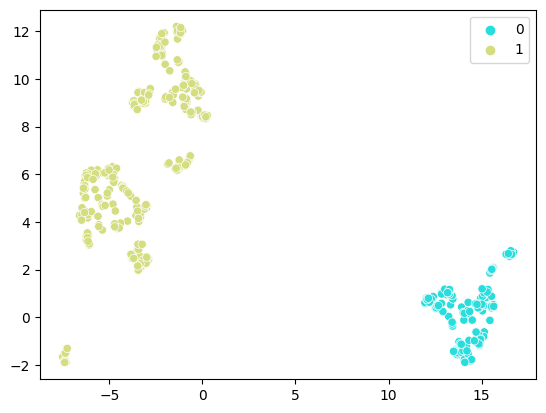

In [94]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels_cl_2, palette='rainbow')

In [95]:
data_scaled['labels'] = labels_cl_2
df_ord_enc['labels'] = labels_cl_2
df_ord_enc['labels'].value_counts(normalize=True)

labels
1    0.678161
0    0.321839
Name: proportion, dtype: float64

In [96]:
df_ord_enc['labels'].value_counts(normalize=True).sort_index()

labels
0    0.321839
1    0.678161
Name: proportion, dtype: float64

In [97]:
data_scaled.groupby('labels').median().T.round(2)

labels,0,1
Age,0.16,0.25
Sex,0.00,1.00
Job,0.67,0.67
Housing,0.50,0.50
Saving accounts,0.00,0.00
Checking account,0.50,0.50
Credit amount,0.09,0.12
Duration,0.18,0.18
Purpose,0.57,0.43


### 4.2.1 Hierarhical. AgglomerativeClustering


In [48]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

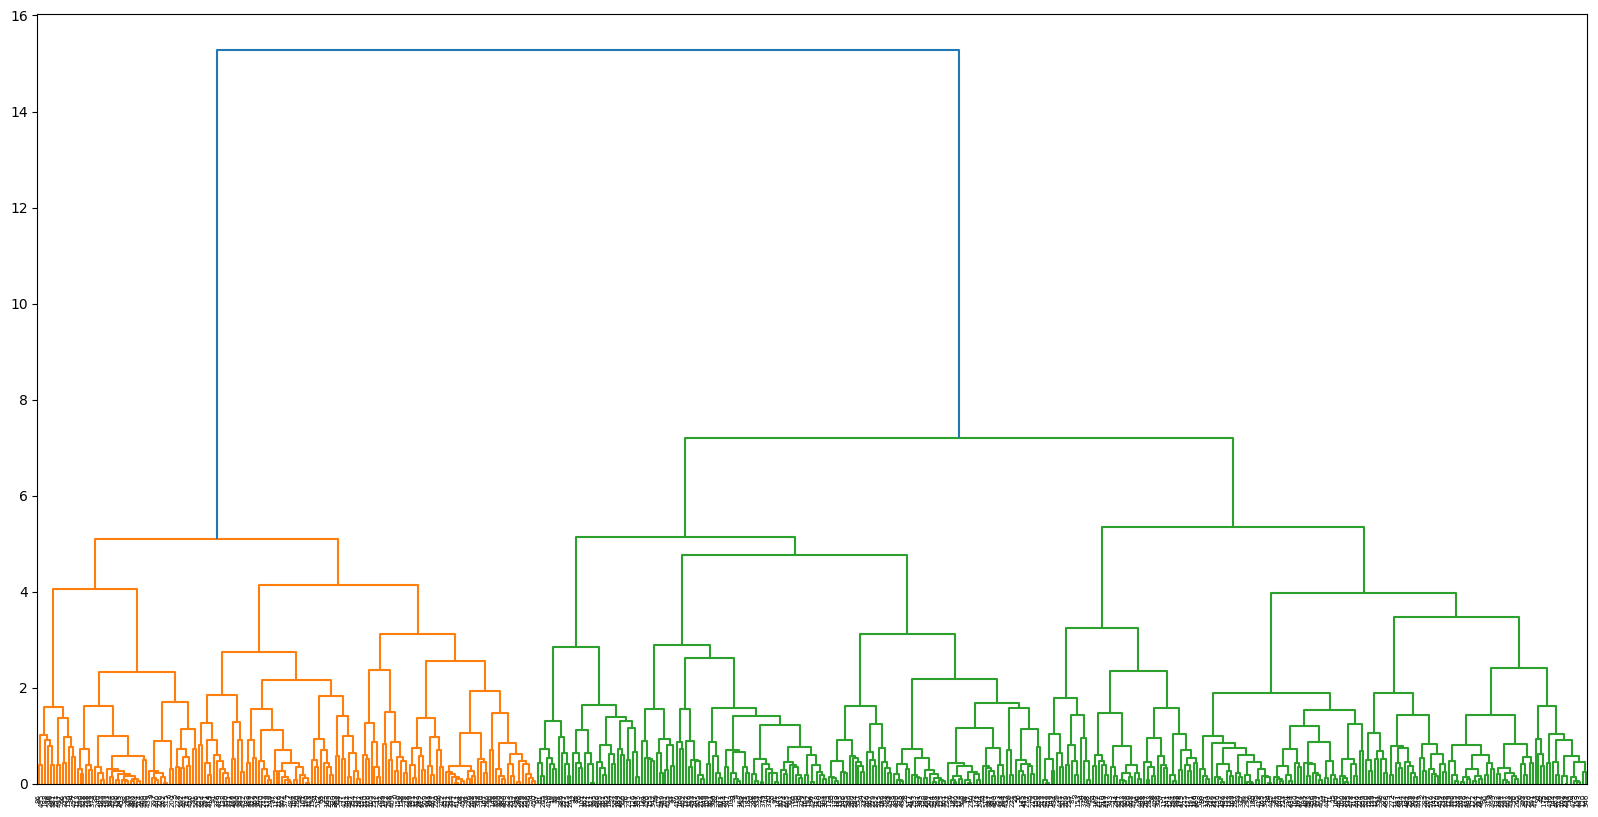

In [49]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

In [50]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|██████████| 9/9 [00:00<00:00, 24.93it/s]


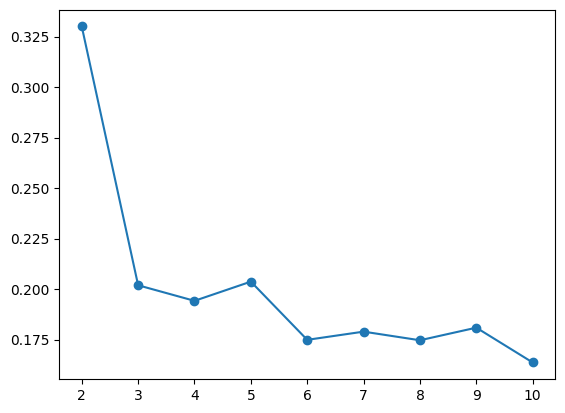

In [51]:
plt.plot(range(2,11), silhouette, marker='o');

#### Силуэт сильно меняется с 3 кластеров, из чего приходим к выводу, что необходимо использовать 2 кластера в нашей модели
#### Имеет смысл разбить данные на 2 кластера

In [98]:
agg = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
labels_agg = agg.labels_

#### c UMAP

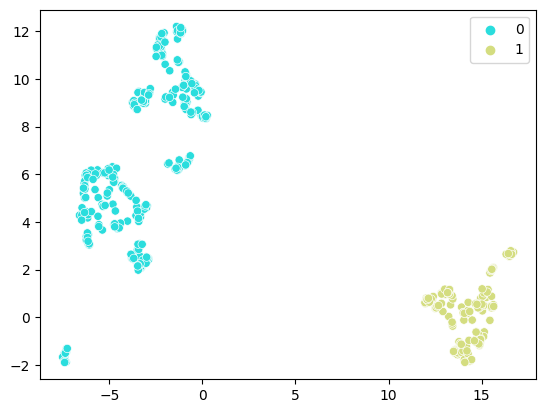

In [99]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels_agg, palette='rainbow');

#### с TSNE

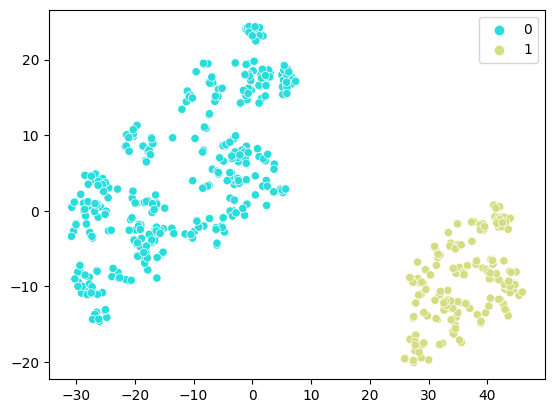

In [100]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_agg, palette='rainbow');

#### с PCA

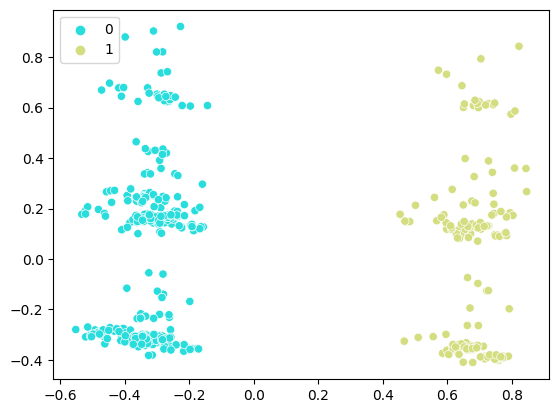

In [101]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_agg, palette='rainbow');

In [102]:
data_scaled['labels_agg'] = labels_cl_2
data_scaled.groupby('labels_agg').median().T.round(2)

labels_agg,0,1
Age,0.16,0.25
Sex,0.00,1.00
Job,0.67,0.67
Housing,0.50,0.50
Saving accounts,0.00,0.00
Checking account,0.50,0.50
Credit amount,0.09,0.12
Duration,0.18,0.18
Purpose,0.57,0.43
labels,0.00,1.00


### 4.2.3. DBSCAN

In [59]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████| 90/90 [00:01<00:00, 85.21it/s]


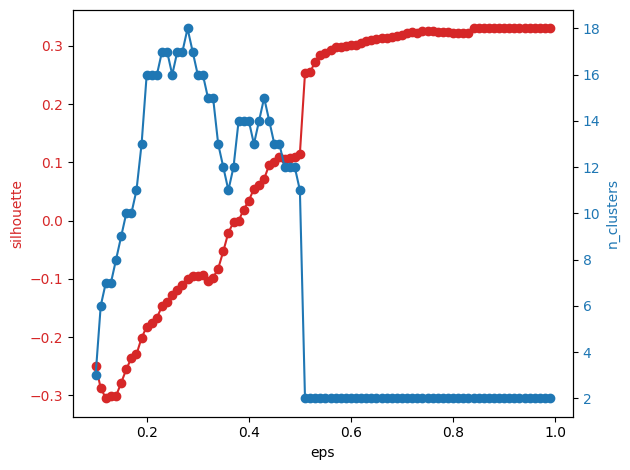

In [60]:
eps_range = np.arange(0.1,1,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|██████████| 50/50 [00:00<00:00, 73.08it/s]


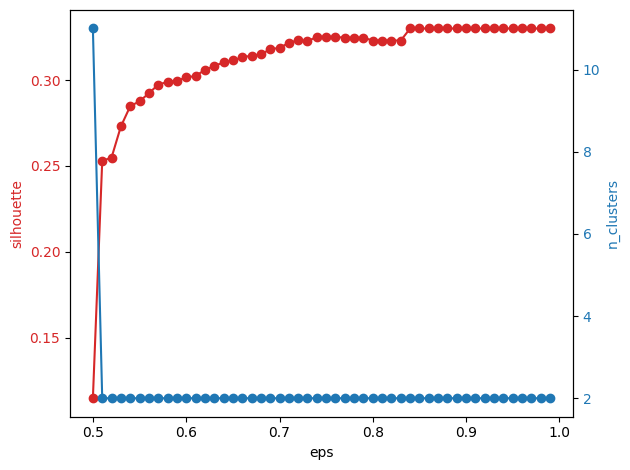

In [66]:
eps_range = np.arange(0.5,1.0,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|██████████| 20/20 [00:00<00:00, 69.63it/s]


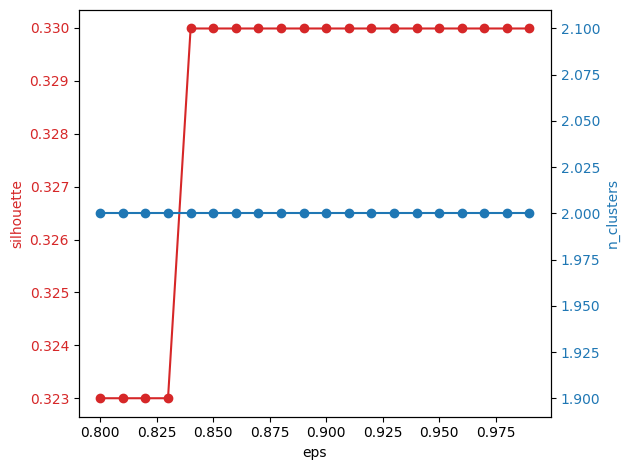

In [67]:
eps_range = np.arange(0.8,1.0,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|██████████| 6/6 [00:00<00:00, 64.69it/s]


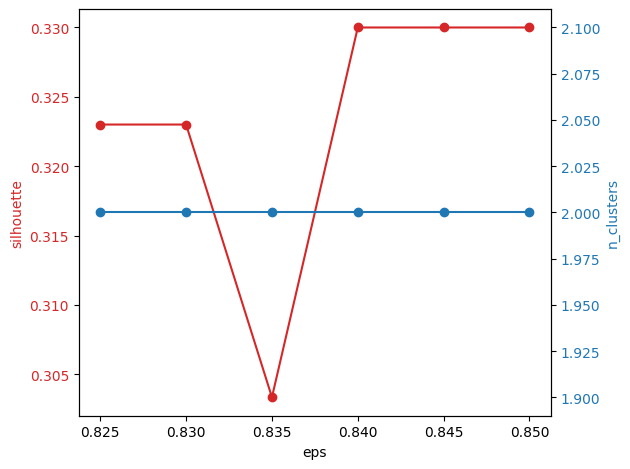

In [68]:
eps_range = np.arange(0.825,0.850,0.005)
dbscan_clustering(eps_range, X_scaled)

#### максимум силуэт(eps) = 0.840

In [69]:
dbscan = DBSCAN(eps=0.840).fit(X_scaled)
labels = dbscan.labels_

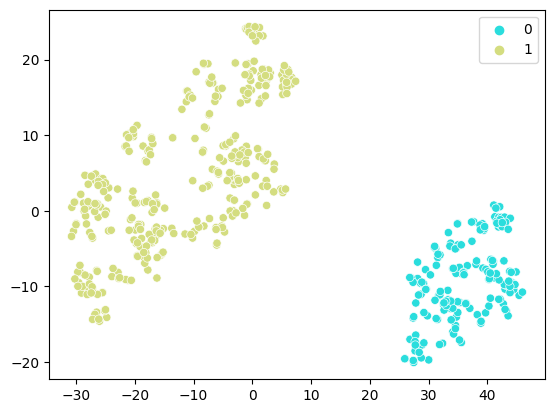

In [70]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

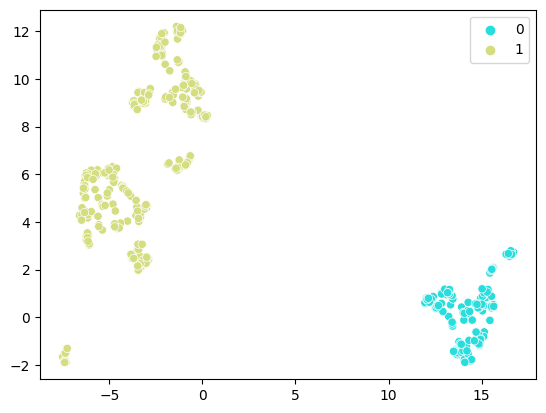

In [72]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels, palette='rainbow');

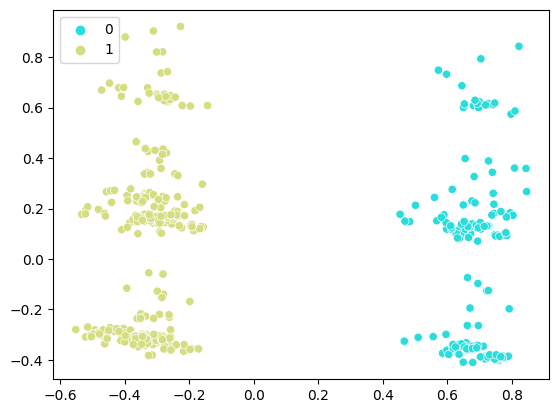

In [71]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='rainbow');

In [75]:
df_ord_enc['labels'] = labels

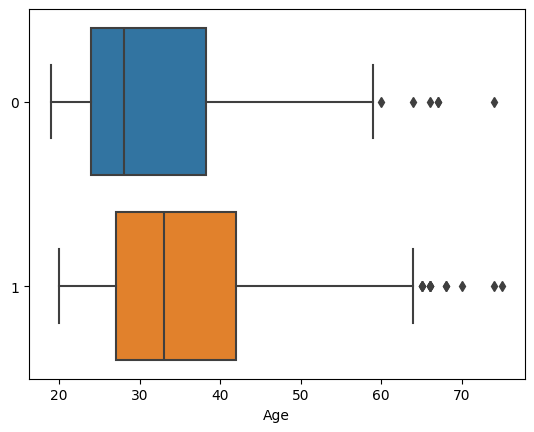

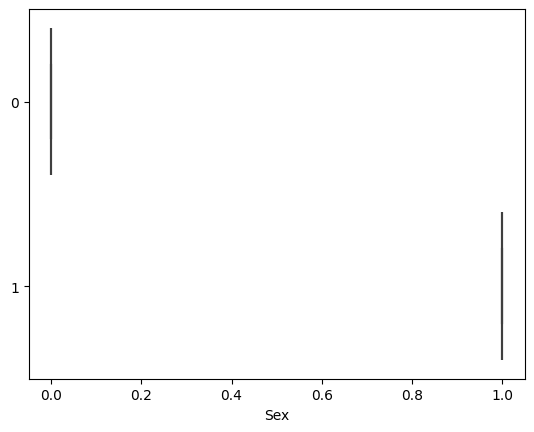

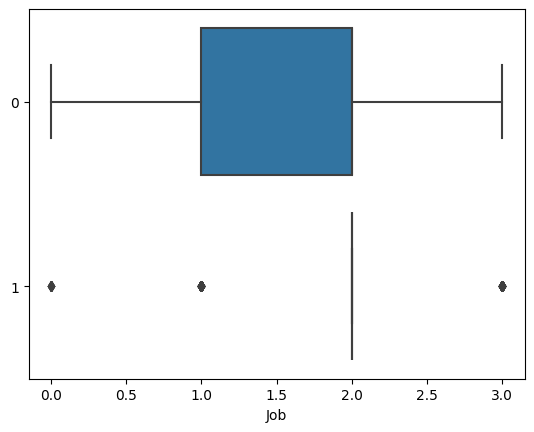

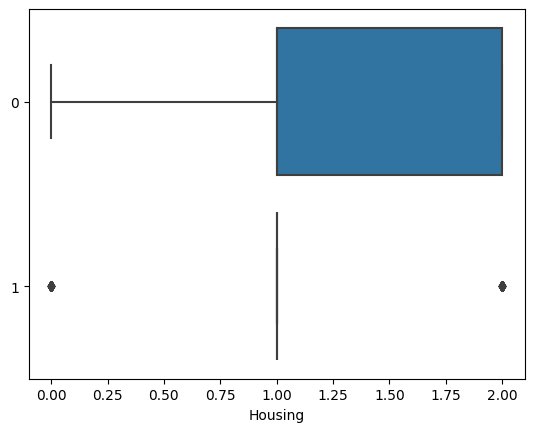

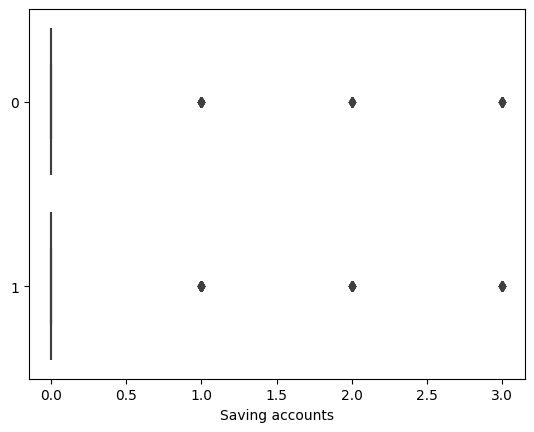

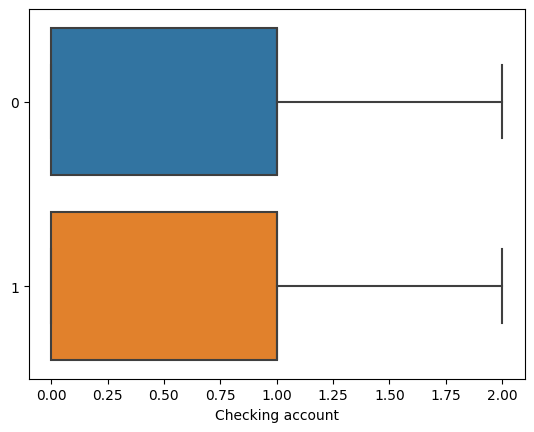

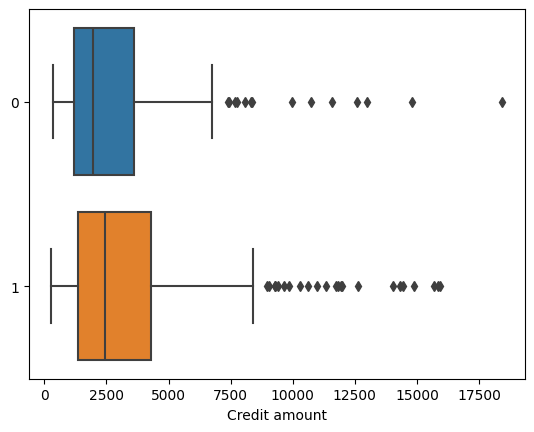

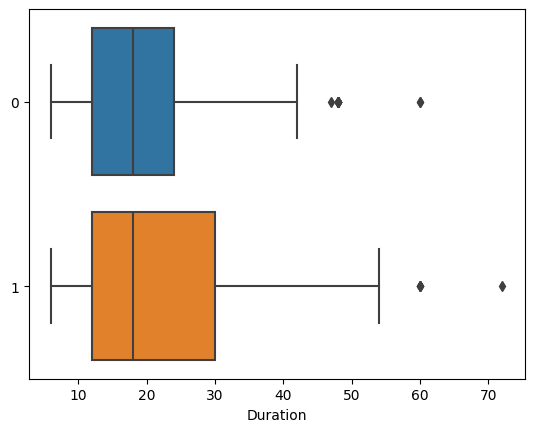

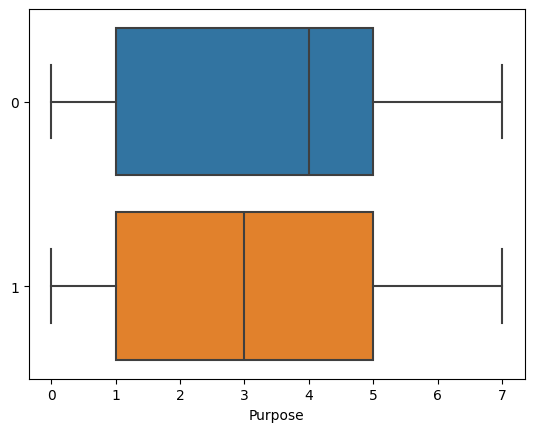

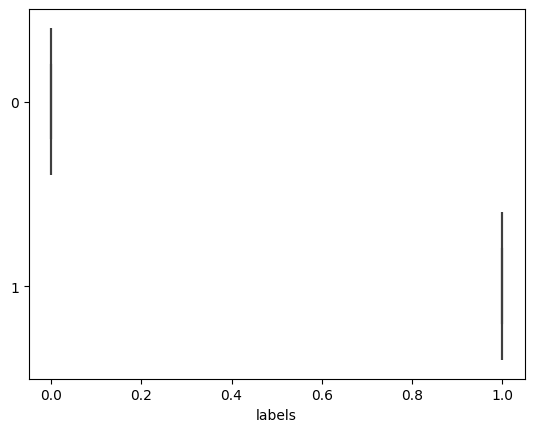

In [76]:
for col in df_ord_enc.columns:
    sns.boxplot(data=df_ord_enc, x=col, y=labels, orient='h')
    plt.show();

In [78]:
df_ord_enc.groupby('labels').median().T.round(2)

labels,0,1
Age,28.0,33.0
Sex,0.0,1.0
Job,2.0,2.0
Housing,1.0,1.0
Saving accounts,0.0,0.0
Checking account,1.0,1.0
Credit amount,1959.0,2452.0
Duration,18.0,18.0
Purpose,4.0,3.0


#### ко второму кластеру относятся мужчины и, как правило, они чуть постарше женщин, которые относятся к первому кластеру
#### Люди, которые относятся ко второму кластеру, как правило берут больше кредитов и на более продолжительный срок, чем люди, 
#### которые относятся к первому кластеру
#### Также  к первому кластеру относятся люди, которые занимаются в основном неквалифицированным трудом или являются квалифицированными специалистами
#### ко второму кластеру относятся люди, занятые только квалифицированным трудом
#### люди из первого кластера жилье в основном либо арендуют, либо free
#### люди, относящиеся ко второй категории, арендуют жилье
#### обе категории людей берут в основном кредиты на мебель/оборудование, радио/ТВ, бытовая техника, ремонт, образование,
#### но первая категория людей в среднем берет кредит на ремонт, а вторая на бытовую технику
#### из чего можно выдвинуть гипотезу: женщины до 30 берут кредиты в основном на ремонт, а мужчины, которым чуть больше 30(33) берут кредиты на бытовую #### технику, возможно, в качестве подарка своим половинкам, либо для себя, т.к. одиноки и хотят упростить себе домашний труд

#### Каждый из алгоритмов показал хорошие данные по выделению кластеров.
#### Среди алгоритмов снижения развмерности отмечу TSNE и UMAP - они четко показали 2 кластера